In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [333]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [335]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,36
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,24
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,32
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,32


#Используя данные и модель дерева решений из предыдущего задания (Титаник), выполните следующие шаги:

##Задание 1 - Построение графиков: Создайте несколько графиков, которые визуализируют основные характеристики датасета.

Let's see if there is any noticable dependance of survivability on age and if it is different for male and female passengers:

In [334]:
df['ageGroup'] = pd.cut(df['Age'], bins=20, labels = range(0,80,4))

dfWomen = df[df['Sex'] == 'female']

dfMen = df[df['Sex'] == 'male']

<ipython-input-203-c5d7749adf9b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageSurvivabilityWomen = dfWomen.groupby('ageGroup')['Survived'].mean()
<ipython-input-203-c5d7749adf9b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageSurvivabilityMen = dfMen.groupby('ageGroup')['Survived'].mean()


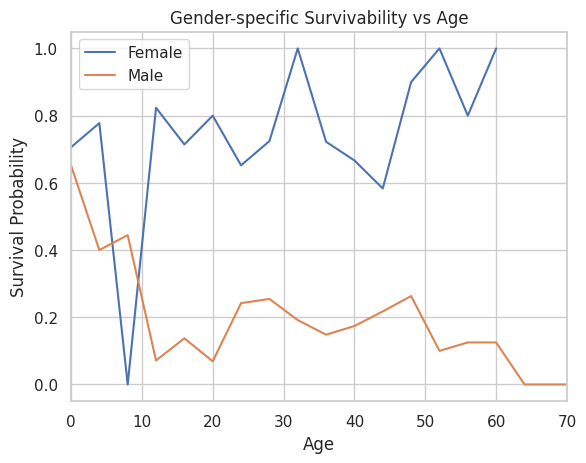

In [203]:
ageSurvivabilityWomen = dfWomen.groupby('ageGroup')['Survived'].mean()

ageSurvivabilityMen = dfMen.groupby('ageGroup')['Survived'].mean()

plt.plot(ageSurvivabilityWomen.index, ageSurvivabilityWomen.values, label = 'Female')

plt.plot(ageSurvivabilityMen.index, ageSurvivabilityMen.values, label = 'Male')

plt.title('Gender-specific Survivability vs Age')

plt.xlim(0,70)

plt.xlabel('Age')

plt.ylabel('Survival Probability')

plt.legend()

We get a srprising result: there is a clear decrease of survivability for older male passengers, however there is no such dependance for women. On the contrary, from the first glance it may even seem that the older the woman, the bigger are her chances for a place in a boat.

However, if we create the same plot with more point, it will show a complete absence of dependancy for female survivability on age.

<ipython-input-211-1227bf74331b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageSurvivabilityWomen = dfWomen.groupby('ageGroupFrequent')['Survived'].mean()


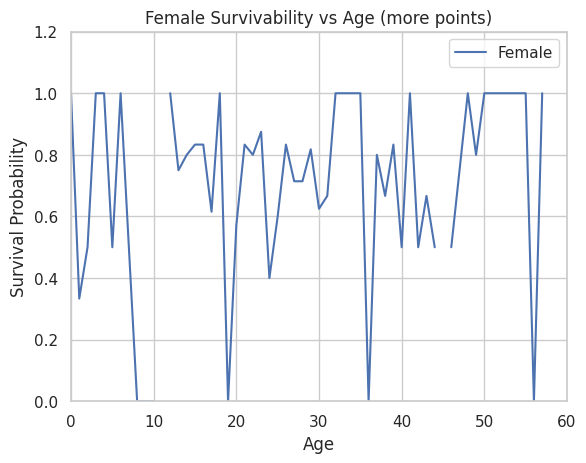

In [211]:
df['ageGroupFrequent'] = pd.cut(df['Age'], bins=80, labels = range(0,80,1))

dfWomen = df[df['Sex'] == 'female']

ageSurvivabilityWomen = dfWomen.groupby('ageGroupFrequent')['Survived'].mean()

plt.plot(ageSurvivabilityWomen.index, ageSurvivabilityWomen.values, label = 'Female')

plt.title('Female Survivability vs Age (more points)')

plt.xlim(0,60)

plt.ylim(0,1.2)

plt.xlabel('Age')

plt.ylabel('Survival Probability')

plt.legend(loc = 'best')

##Задание 2 - Постройте диаграмму рассеяния (scatter plot) для визуализации зависимости переменных.

We have already found that survivability of the passengers heavily depended on age, ticket class and gender. Let us create separate survivability scatterplots for male and female passengers depending on Age and Ticket fare.

Actually, those two parameters are the only ones that have float values, which are preferable for scatterplots.

In [176]:
dfWomen = df[df['Sex'] == 'female']

dfMen = df[df['Sex'] == 'male']

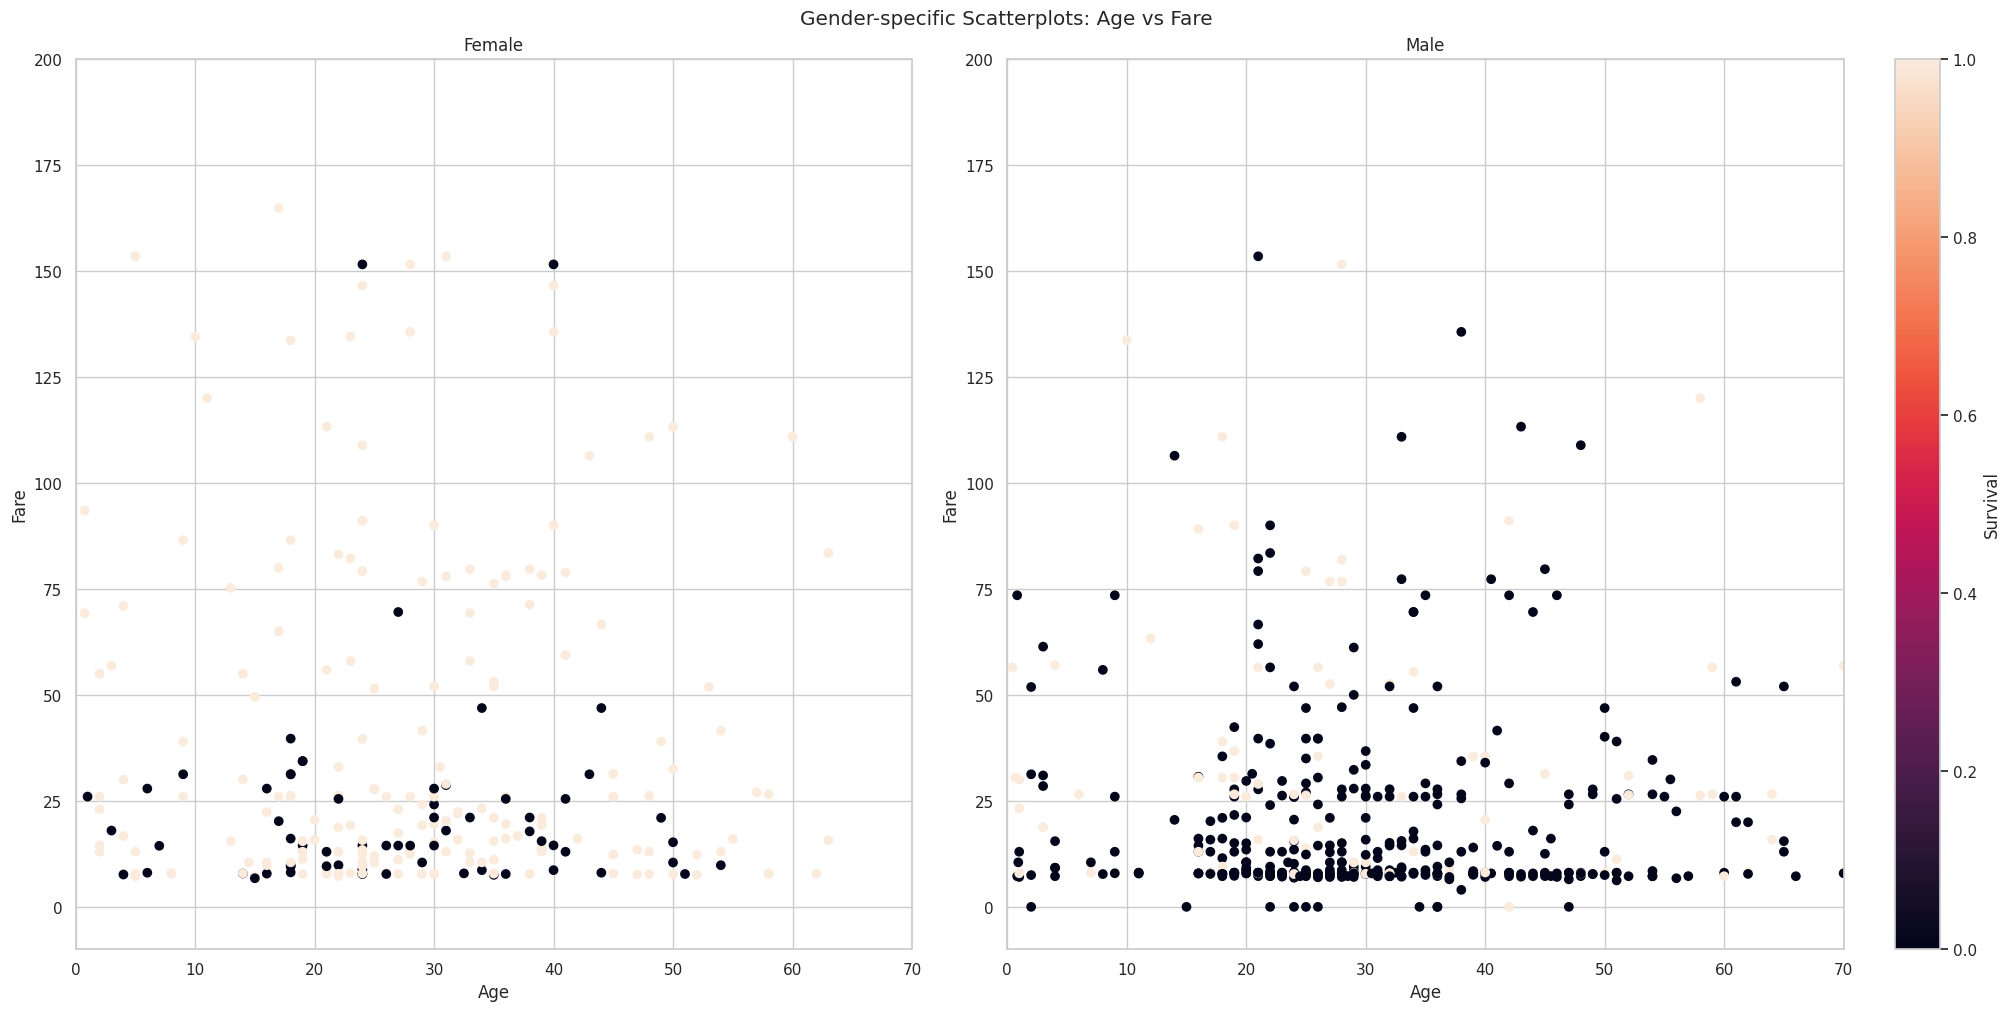

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), layout = 'constrained')

fig.suptitle('Gender-specific Scatterplots: Age vs Fare')

female = ax[0].scatter(dfWomen['Age'].dropna()[:len(dfWomen['Fare'].dropna())], dfWomen['Fare'].dropna()

 [:len(dfWomen[['Age']].dropna())], c = dfWomen['Survived'][:min(len(dfWomen['Age'].dropna()[:len(dfWomen['Fare'].dropna())]), len(dfWomen['Fare'].dropna()[:len(dfWomen[['Age']].dropna())]))])

ax[0].set_ylim(-10,200)

ax[0].set_xlim(0,70)

ax[0].set_title('Female')

ax[0].set_xlabel('Age')

ax[0].set_ylabel('Fare')

male = ax[1].scatter(dfMen['Age'].dropna()[:len(dfMen['Fare'].dropna())], dfMen['Fare'].dropna()

 [:len(dfMen[['Age']].dropna())], c = dfMen['Survived'][:min(len(dfMen['Age'].dropna()[:len(dfMen['Fare'].dropna())]), len(dfMen['Fare'].dropna()[:len(dfMen[['Age']].dropna())]))])

ax[1].set_ylim(-10,200)

ax[1].set_xlim(0,70)

ax[1].set_title('Male')

ax[1].set_xlabel('Age')

ax[1].set_ylabel('Fare')

fig.colorbar(male, ax = ax[1], label = 'Survival')

As could be presumed, almost all female deaths were among underclass passengers. Distribution of male survivors shows no dependance on age or fare for the naked eye.

##Задание 3 - Постройте столбчатую диаграмму для сравнения выживаемости пассажиров в зависимости от пола или класса билета.

In [21]:
survivedBySex = df.groupby('Sex')['Survived'].sum()

boardedBySex = df.groupby('Sex')['Survived'].count()

survivedByPclass = df.groupby('Pclass')['Survived'].sum()

boardedByPclass = df.groupby('Pclass')['Survived'].count()

df['ageGroup'] = pd.cut(df['Age'], bins=[0, 7, 16, 30, 50, 81], labels=['preSchool', 'child', 'youth', 'middleAge', 'senior'])

survivedByAgeGroup = df.groupby('ageGroup')['Survived'].sum()

boardedByAgeGroup = df.groupby('ageGroup')['Survived'].count()

<ipython-input-21-687038f67d5a>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivedByAgeGroup = df.groupby('ageGroup')['Survived'].sum()
<ipython-input-21-687038f67d5a>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boardedByAgeGroup = df.groupby('ageGroup')['Survived'].count()


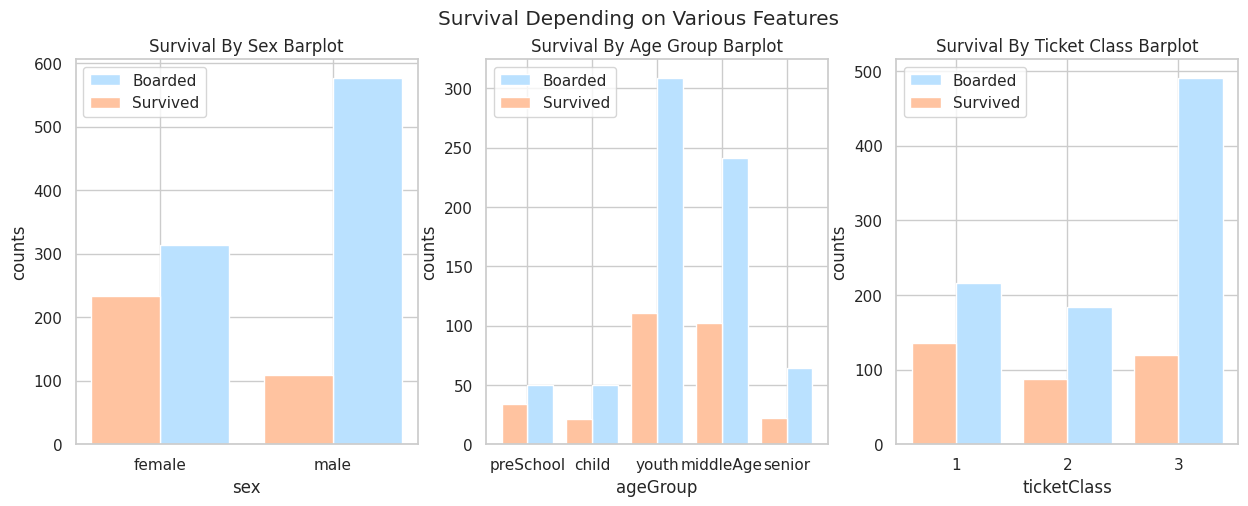

In [97]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

fig.suptitle('Survival Depending on Various Features')

ax[0].bar(boardedBySex.index, boardedBySex.values, 0.4, label = 'Boarded', align = 'edge', color = '#BAE1FF')
ax[0].bar(survivedBySex.index, survivedBySex.values, -0.4, label = 'Survived', align = 'edge', color = '#FFC3A0')
ax[0].set_xlabel('sex')
ax[0].set_ylabel('counts')
ax[0].set_title('Survival By Sex Barplot')
ax[0].legend()

ax[1].bar(boardedByAgeGroup.index, boardedByAgeGroup.values, 0.4, label = 'Boarded', align = 'edge', color = '#BAE1FF')
ax[1].bar(survivedByAgeGroup.index, survivedByAgeGroup.values, -0.4, label = 'Survived', align = 'edge', color = '#FFC3A0')
ax[1].set_xlabel('ageGroup')
ax[1].set_ylabel('counts')
ax[1].set_title('Survival By Age Group Barplot')
ax[1].legend(loc = 'upper left')

ax[2].bar(boardedByPclass.index, boardedByPclass.values, 0.4, label = 'Boarded', align = 'edge', color = '#BAE1FF')
ax[2].bar(survivedByPclass.index, survivedByPclass.values, -0.4, label = 'Survived', align = 'edge', color = '#FFC3A0')
ax[2].set_xticks(range(min(boardedByPclass.index), max(boardedByPclass.index) + 1))
ax[2].set_xlabel('ticketClass')
ax[2].set_ylabel('counts')
ax[2].set_title('Survival By Ticket Class Barplot')
ax[2].legend(loc = 'upper left')

##Задание 4 - Боксплоты: Постройте boxplot (диаграмму размаха) для анализа распределения возраста пассажиров в зависимости от их выживаемости

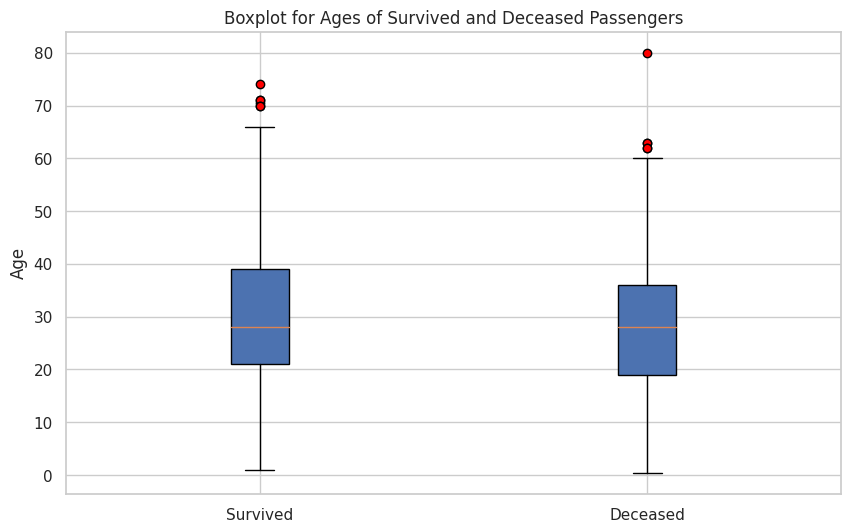

In [235]:
plt.figure(figsize=(10, 6))

data = [df[df['Survived'] == 0]['Age'].dropna(), df[df['Survived'] == 1]['Age'].dropna()]

box_colors = {
    'boxes': 'blue',
    'whiskers': 'blue',
    'medians': 'red',
    'caps': 'blue',
    'fliers': 'red'
}

box = plt.boxplot(data, labels=['Survived', 'Deceased'], patch_artist=True,
            flierprops = dict(markerfacecolor=box_colors['fliers']))

plt.title('Boxplot for Ages of Survived and Deceased Passengers')

plt.ylabel('Age')

plt.grid(True)

plt.show()

##Задание 5 - Постройте круговую диаграмму для визуализации распределения пассажиров по полу или классу.

<ipython-input-260-2f83696ad957>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfAgeGroup = df.groupby('ageGroup')['Survived'].count()


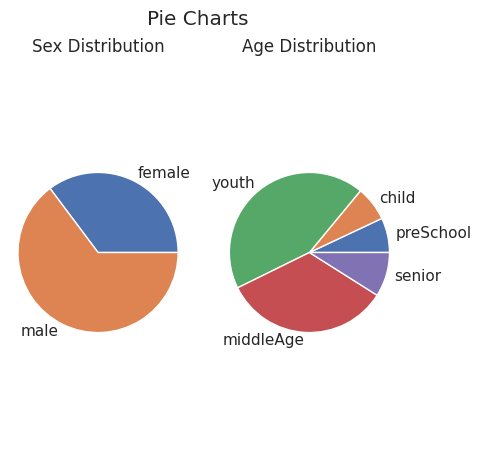

In [260]:
dfSex = df.groupby('Sex')['Survived'].count()

df['ageGroup'] = pd.cut(df['Age'], bins=[0, 7, 16, 30, 50, 81], labels=['preSchool', 'child', 'youth', 'middleAge', 'senior'])

dfAgeGroup = df.groupby('ageGroup')['Survived'].count()

fig, ax = plt.subplots(1,2, figsize = (5,5))

fig.suptitle('Pie Charts')

ax[0].pie(dfSex, labels = dfSex.index, startangle = 0)

ax[1].pie(dfAgeGroup, labels = dfAgeGroup.index, startangle = 0)

ax[0].set_title('Sex Distribution')
ax[1].set_title('Age Distribution')
ax[0].axis('equal')
ax[1].axis('equal')
plt.show()

##Задание 6 - На основе модели дерева решений, которую вы построили в предыдущем задании, визуализируйте структуру дерева. Опишите, какие выводы можно сделать на основе полученного дерева решений.

DecisionTreeClassifier model from the previous task. Set a limit for max_depth for better visualization.

In [360]:
dfData = df[['Sex', 'Age', 'Fare']]

dfTarget = df['Survived']

In [361]:
dfData['Sex'] = dfData['Sex'].map({'male': 0, 'female': 1})

<ipython-input-361-7b4241bad0f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfData['Sex'] = dfData['Sex'].map({'male': 0, 'female': 1})


In [362]:
X_train, X_test, y_train, y_test = train_test_split(dfData, dfTarget, test_size = 0.2, random_state = 42)

In [363]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [367]:
titanicTree = DecisionTreeClassifier(random_state = 42, max_depth = 4)

titanicTree.fit(X_train, y_train)

y_pred = titanicTree.predict(X_test)

Visualization:

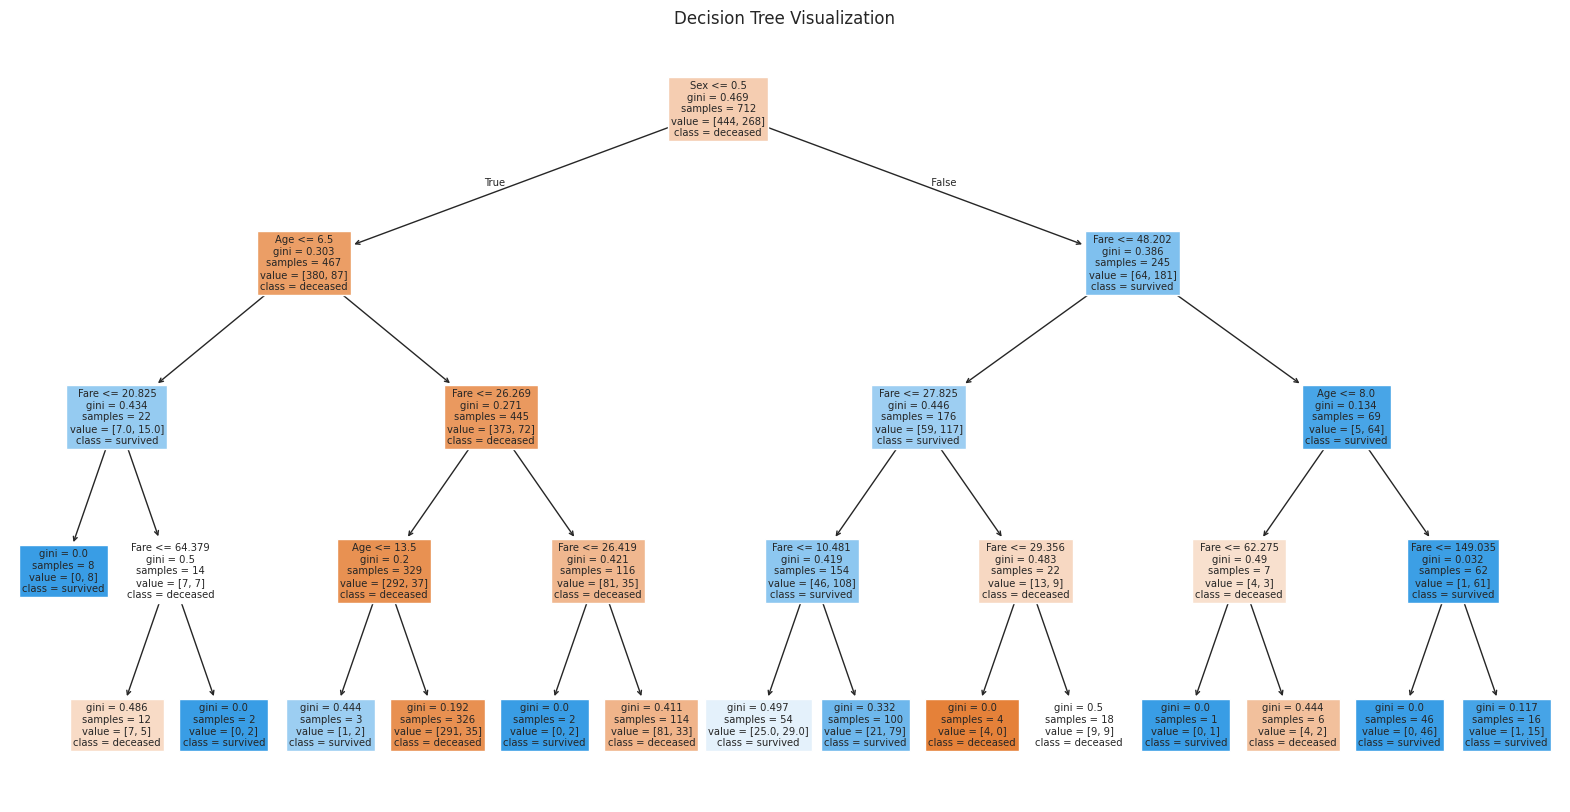

In [368]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(titanicTree, filled=True, feature_names = ['Sex', 'Age', 'Fare'], class_names = ['deceased', 'survived'])
plt.title("Decision Tree Visualization")
plt.show()

We may notice that big variety of fare for the third class leads to overfitting of the model, hence the low f1-score in case of unlimited depth.

By setting the limit we have actually obtained a better classifier.

In [369]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.75
Precision: 0.76
Recall: 0.59
F1 Score: 0.67
